In [1]:
# import requests  # Для выполнения HTTP-запросов
# from bs4 import BeautifulSoup  # Для парсинга HTML-кода страницы
# import time  # Для создания задержек между запросами
# import pandas as pd

# def scrape_page(url, page):
#     try:
#         response = requests.get(url, headers={"User-Agent": "Mozilla/5.0"}, timeout=(10, 20))

#         if response.status_code == 200:
#             soup = BeautifulSoup(response.text, "html.parser")

#             products = soup.find_all("div", class_="a-card__inc")

#             product_data = []

#             for product in products:

#                 # Извлечение названия
#                 title_tag = product.find("a", class_="a-card__title")
#                 title = title_tag.text.strip() if title_tag else "N/A"

#                 # Извлечение ссылки на объявление
#                 ad_link = f"https://krisha.kz{title_tag['href']}" if title_tag and title_tag.has_attr("href") else "N/A"

#                 # Извлечение цены
#                 price_tag = product.find("div", class_="a-card__price")
#                 price = price_tag.text.strip().replace('\xa0', ' ') if price_tag else "N/A"

#                 # Извлечение подзаголовка
#                 subtitle_tag = product.find("div", class_="a-card__subtitle")
#                 subtitle = subtitle_tag.text.strip() if subtitle_tag else "N/A"

#                 # Извлечение текстового описания
#                 text_preview_tag = product.find("div", class_="a-card__text-preview")
#                 text_preview = text_preview_tag.text.strip() if text_preview_tag else "N/A"

#                 product_data.append({
#                     "Title": title,
#                     "Ad Link": ad_link,  # Ссылка на объявление
#                     "Price": price,
#                     "Subtitle": subtitle,
#                     "Text Preview": text_preview
#                 })
#             print(f"Successfully retrieved the page: {url}", f"page {page}")
#             return product_data
#         else:
#             print(f"Failed to retrieve page: {url}")
#             return []
#     except requests.exceptions.ConnectTimeout:
#         print(f"Connection to {url} timed out.")
#         return []
#     except requests.exceptions.RequestException as e:
#         print(f"Error occurred while requesting {url}: {e}")
#         return []


# base_url = "https://krisha.kz/arenda/kvartiry/almaty/?das[_sys.hasphoto]=1&rent-period-switch=%2Farenda%2Fkvartiry&page="

# all_product_data = []

# for page in range(1, 51): 
#     url = f"{base_url}{page}"  
#     page_data = scrape_page(url, page)
#     all_product_data.extend(page_data)

#     time.sleep(5)  

# df = pd.DataFrame(all_product_data)
# df.head()


In [2]:
# df.info()

In [3]:
# df['Rooms'] = df['Title'].str.extract(r'(\d+)-комнатная').astype(float)
# df['Area'] = df['Title'].str.extract(r'(\d+\.?\d*) м²').astype(float)
# df['Floor'] = df['Title'].str.extract(r'(\d+)/\d+ этаж').astype(float)
# df['Total Floors'] = df['Title'].str.extract(r'\d+/(\d+) этаж').astype(float)
# df['Price'] = df['Price'].str.replace('〒', '').str.replace(' ', '').astype(str)
# df['Price'] = df['Price'].astype(float)
# df[['district', 'address']] = df['Subtitle'].str.split(', ', n=1, expand=True)
# df.drop(columns=['Title', 'Subtitle'], inplace=True)
# df.info()

In [4]:
# df.isnull().sum()

In [5]:
# print(df.duplicated().sum())

In [6]:
# df.head()

In [7]:
# import re
# import pandas as pd
# from deep_translator import GoogleTranslator
# from sklearn.feature_extraction.text import TfidfVectorizer
# from nltk.corpus import stopwords
# import spacy

# stop_words = set(stopwords.words('russian') + stopwords.words('kazakh'))

# nlp = spacy.load("ru_core_news_sm")

# def clean_text(text):
#     text = re.sub(r'[^\w\s]', '', text)  
#     text = re.sub(r'\d+', '', text)  
#     text = text.lower()  
#     return text.strip() 

# def preprocess_text(text):
#     doc = nlp(text)  
#     tokens = [token.lemma_ for token in doc if token.text not in stop_words and not token.is_punct]
#     return ' '.join(tokens)

# def translate_russian_to_kazakh(text):
#     try:
#         russian_words = re.findall(r'[а-яА-ЯёЁ]+', text)
#         if russian_words:
#             translated_words = GoogleTranslator(source='ru', target='kk').translate(" ".join(russian_words))
#             translated_words_list = translated_words.split()
#             for word, translated in zip(russian_words, translated_words_list):
#                 text = text.replace(word, translated)
#         return text
#     except Exception as e:
#         print(f"Ошибка перевода: {e}")
#         return text

# df['Lemmatized Text'] = df['Text Preview'].apply(lambda x: preprocess_text(clean_text(x)))

# df['Translated Text'] = df['Lemmatized Text'].apply(translate_russian_to_kazakh)

# # 3. Инициализация TF-IDF
# tfidf = TfidfVectorizer(max_features=10)  # Ограничиваем до 10 самых важных признаков

# # 4. Преобразование текста в TF-IDF матрицу
# tfidf_matrix = tfidf.fit_transform(df['Translated Text'])

# # 5. Преобразуем TF-IDF матрицу в DataFrame
# tfidf_features = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf.get_feature_names_out())

# # 6. Объединение TF-IDF признаков с основными данными
# df = pd.concat([df, tfidf_features], axis=1)
# df.to_csv('isa.csv')

In [8]:
import pandas as pd

df = pd.read_csv('isa.csv')
df.head()

,Unnamed: 0,Ad Link,Price,Text Preview,Rooms,Area,Floor,Total Floors,district,address,...,бөлмелі,жайлы,жалға,жаңа,жиһаздалған,кешені,пәтер,толық,тұрғын,үй
0,0,https://krisha.kz/a/show/679070311,180000.0,"жил. комплекс Алмалы, меблирована полностью, Р...",1.0,36.0,12.0,12.0,Алатауский р-н,"мкр Акбулак, Байтерекова 63 — Момыш улы",...,0.0,0.000000,0.0,0.0,0.000000,0.683528,0.000000,0.416910,0.599146,0.000000
1,1,https://krisha.kz/a/show/699809718,150000.0,"меблирована полностью, Чистая, оборудованная к...",1.0,33.0,3.0,4.0,Ауэзовский р-н,мкр Сайран — Абая-Утеген батыра,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
2,2,https://krisha.kz/a/show/691887173,350000.0,"жил. комплекс Mega Tower Almaty, меблирована п...",2.0,51.0,3.0,25.0,Абиша Кекилбайулы 270 — ТРЦ Mega Center,Парк первого президента,...,0.0,0.000000,0.0,0.0,0.465828,0.000000,0.000000,0.399514,0.574147,0.541985
3,3,https://krisha.kz/a/show/696471308,380000.0,"жил. комплекс Комфорт Сити, меблирована полнос...",1.0,50.0,6.0,20.0,Бостандыкский р-н,Гагарина 310 — Аль фараби,...,0.0,0.709432,0.0,0.0,0.000000,0.601685,0.000000,0.366990,0.000000,0.000000
4,4,https://krisha.kz/a/show/699610607,500000.0,"меблирована полностью, Сдаётся 3х ком квартира...",3.0,65.0,8.0,9.0,Алмалинский р-н,Жибек Жолы 81 — Панфилова,...,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.961171,0.275953,0.000000,0.000000


In [9]:
df.shape

(1003, 22)

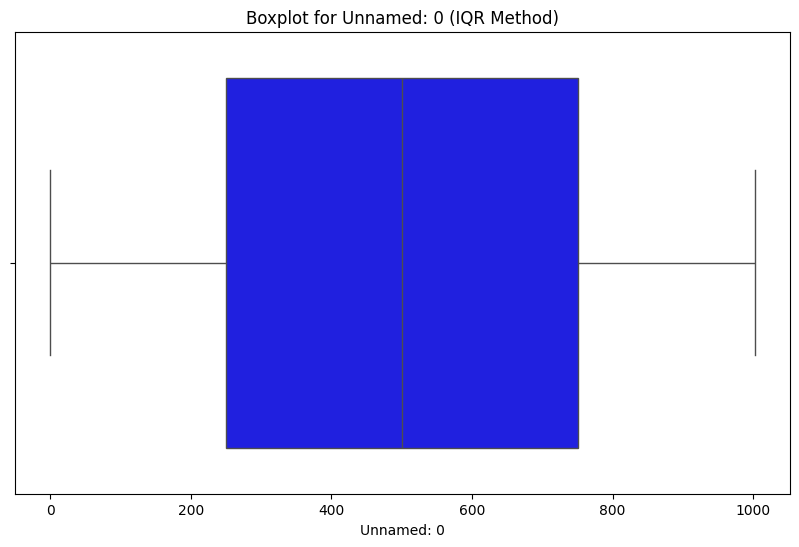

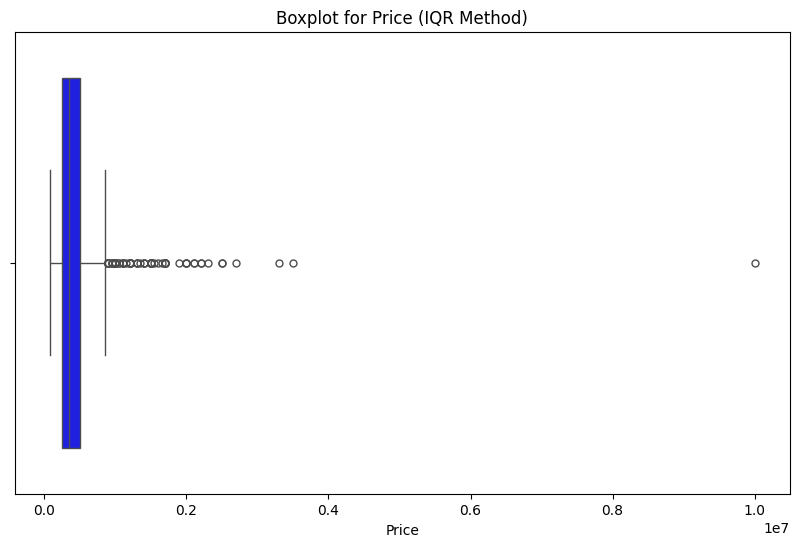

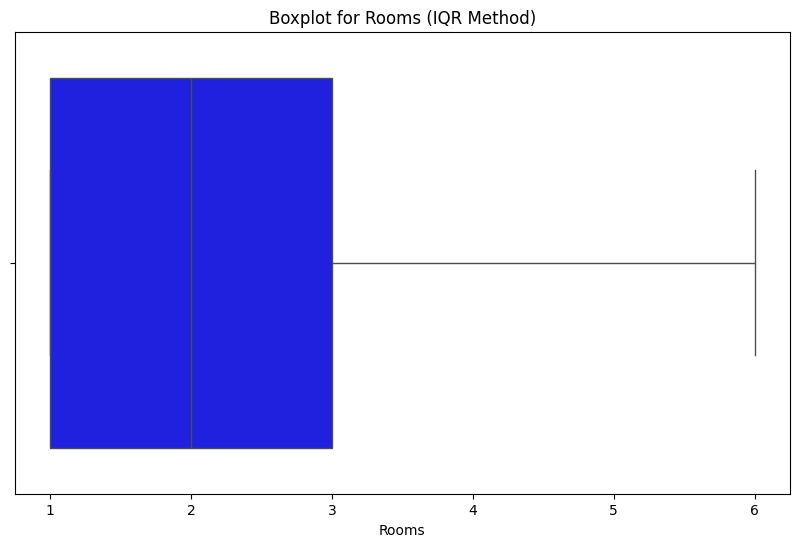

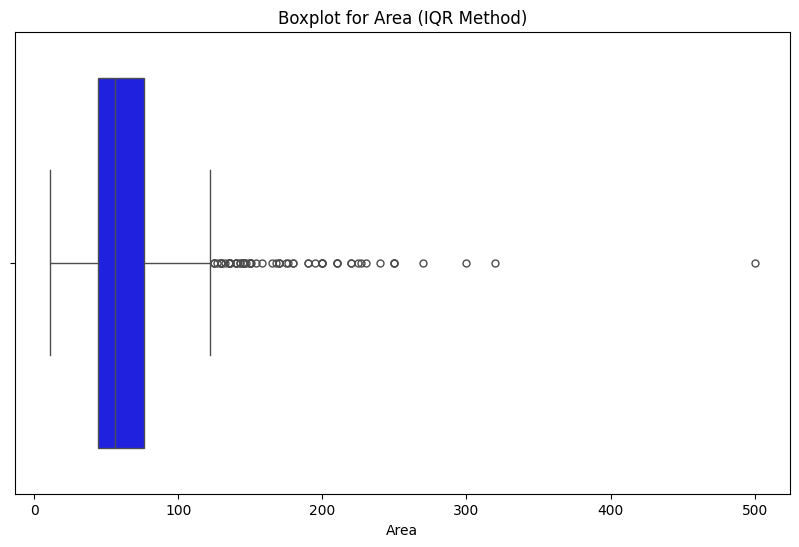

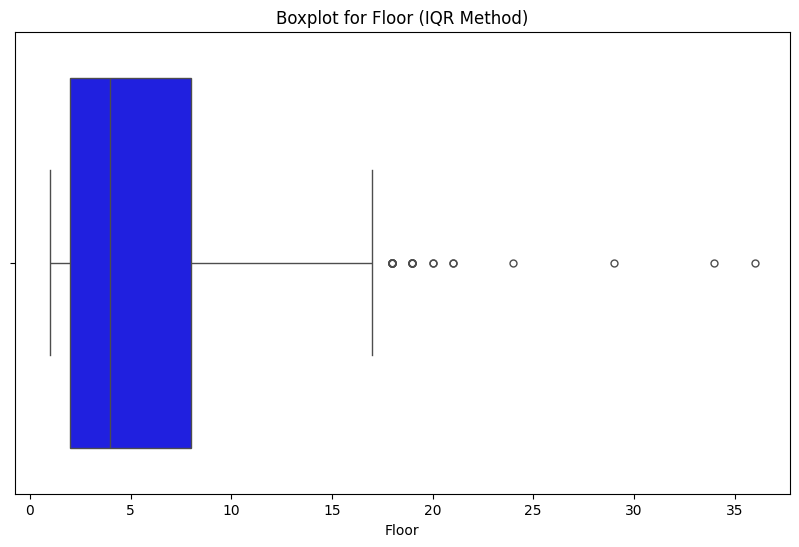

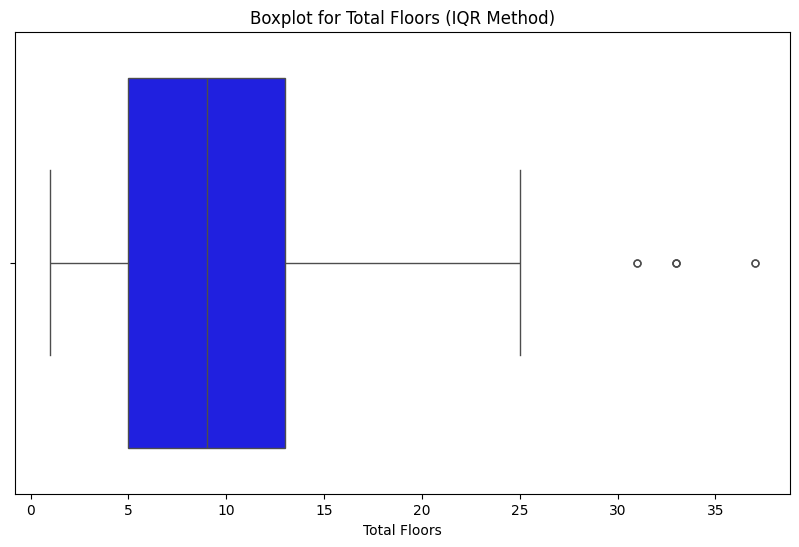

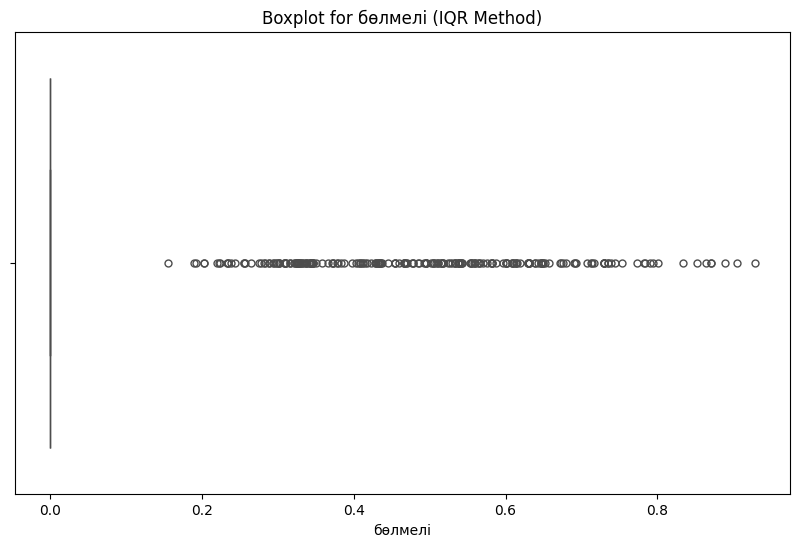

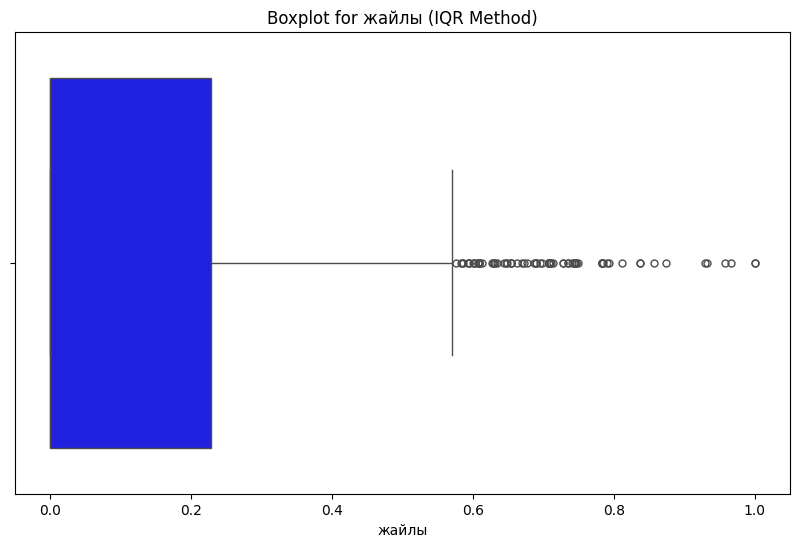

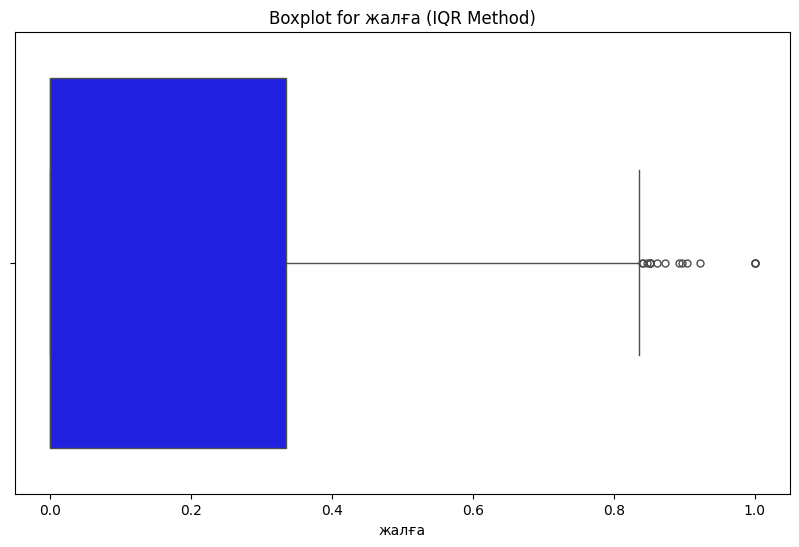

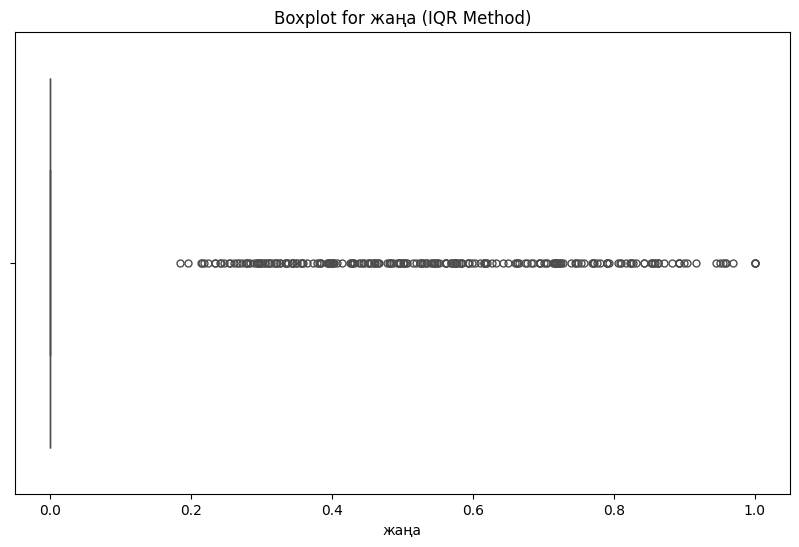

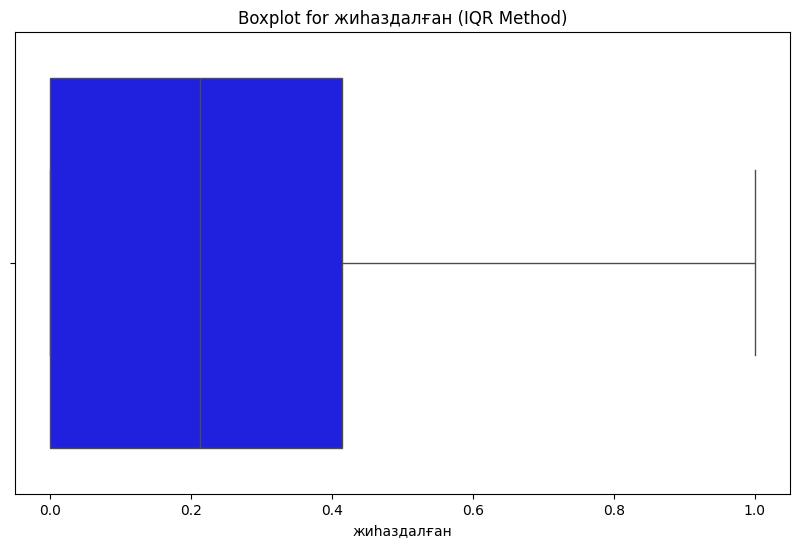

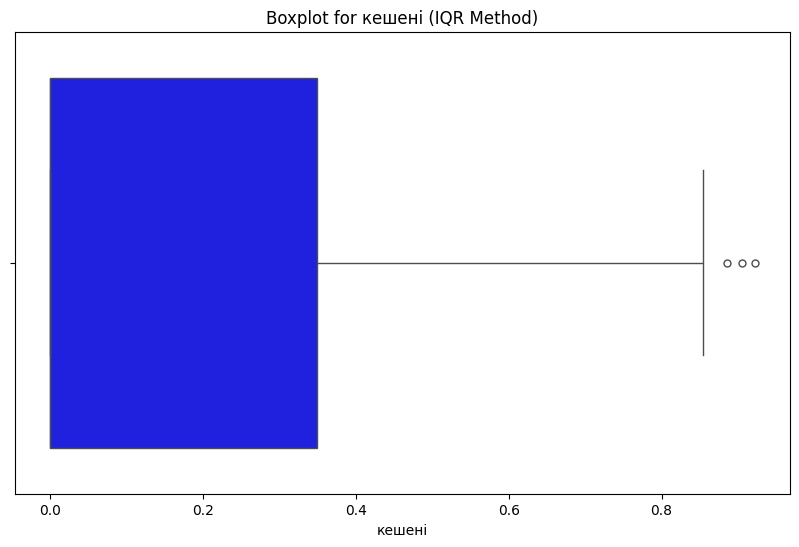

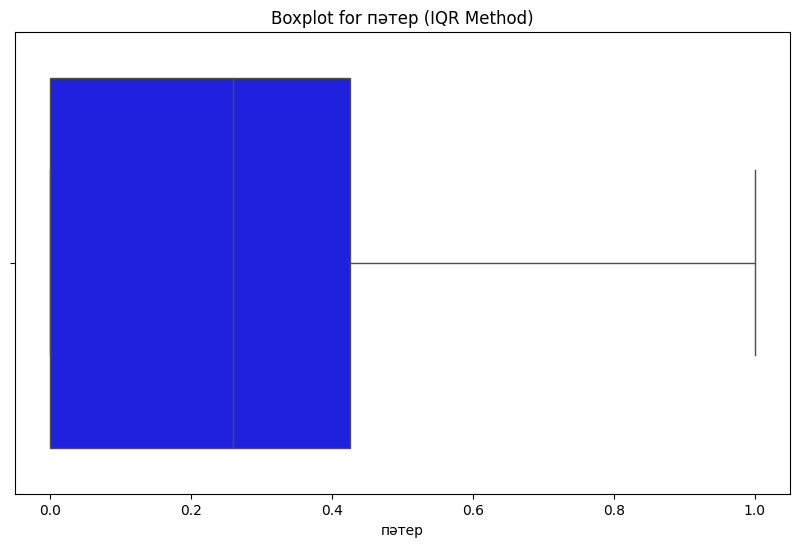

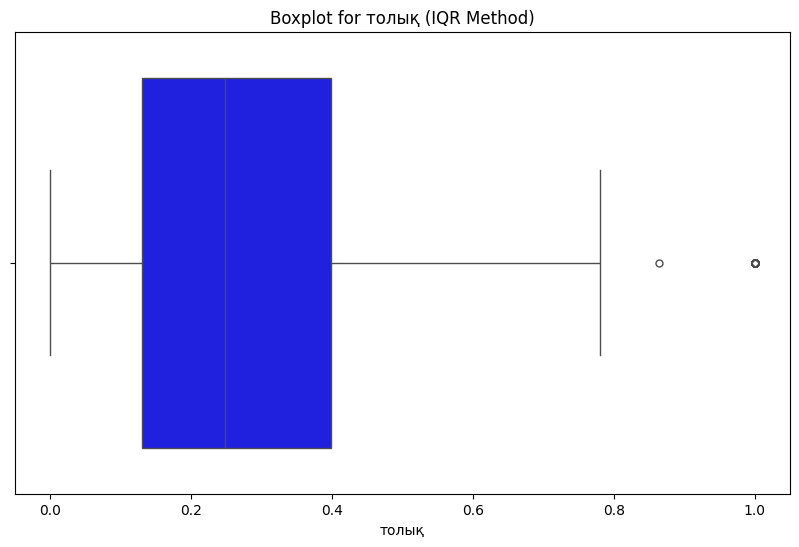

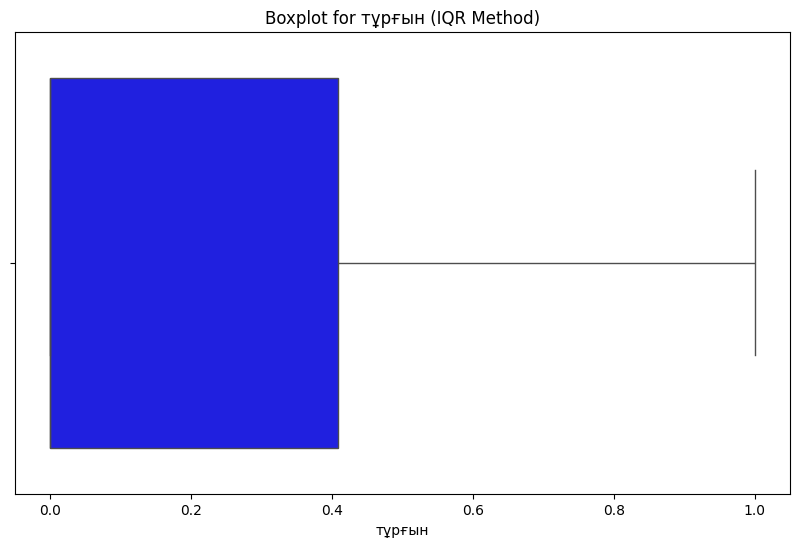

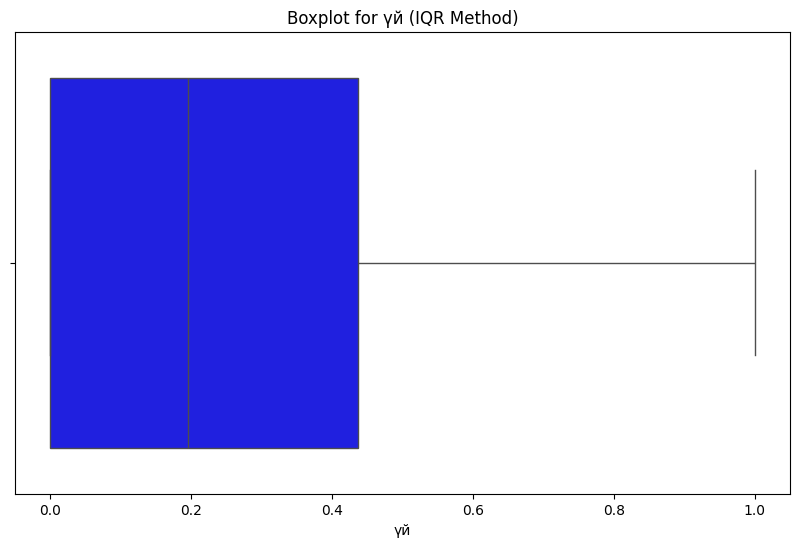

Unnamed: 0 - Количество выбросов: 0
Price - Количество выбросов: 88
Rooms - Количество выбросов: 0
Area - Количество выбросов: 75
Floor - Количество выбросов: 23
Total Floors - Количество выбросов: 7
бөлмелі - Количество выбросов: 226
жайлы - Количество выбросов: 88
жалға - Количество выбросов: 17
жаңа - Количество выбросов: 247
жиһаздалған - Количество выбросов: 0
кешені - Количество выбросов: 3
пәтер - Количество выбросов: 0
толық - Количество выбросов: 25
тұрғын - Количество выбросов: 0
үй - Количество выбросов: 0


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Оставляем только числовые столбцы
numeric_data = df.select_dtypes(include=[np.number])

# Функция для выявления выбросов с помощью IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)  # Первый квартиль (25%)
    Q3 = data[column].quantile(0.75)  # Третий квартиль (75%)
    IQR = Q3 - Q1  # Межквартильный размах
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Выявление выбросов для каждого столбца
outliers = {}
for column in numeric_data.columns:
    outliers[column] = detect_outliers_iqr(numeric_data, column)

# Визуализация выбросов для каждого числового столбца
for column in numeric_data.columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(x=numeric_data[column], color='blue', fliersize=5)
    plt.title(f"Boxplot for {column} (IQR Method)")
    plt.xlabel(column)
    plt.show()

# Список выбросов по каждой переменной
for column, outlier_data in outliers.items():
    print(f"{column} - Количество выбросов: {len(outlier_data)}")

In [11]:
selected_columns = ['Price', 'Rooms', 'Area', 'Floor', 'Total Floors']  
df_selected = df[selected_columns]

# Вывод статистик для выбранных колонок
print(df_selected.describe())


              Price        Rooms         Area       Floor  Total Floors
count  1.003000e+03  1003.000000  1003.000000  948.000000    948.000000
mean   4.602527e+05     2.044865    67.517747    5.726793      9.948312
std    4.748265e+05     0.923729    40.784541    4.618525      5.876273
min    8.000000e+04     1.000000    11.100000    1.000000      1.000000
25%    2.500000e+05     1.000000    44.000000    2.000000      5.000000
50%    3.500000e+05     2.000000    56.100000    4.000000      9.000000
75%    5.000000e+05     3.000000    76.000000    8.000000     13.000000
max    1.000000e+07     6.000000   500.000000   36.000000     37.000000


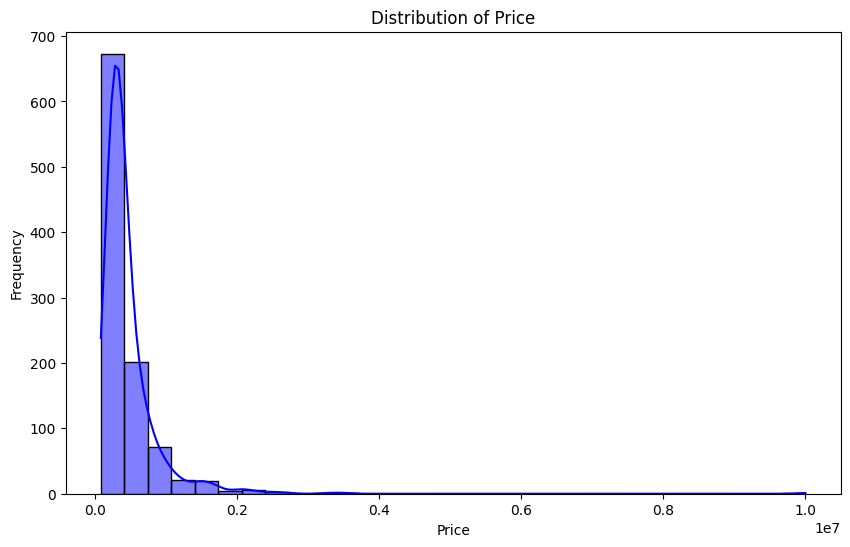

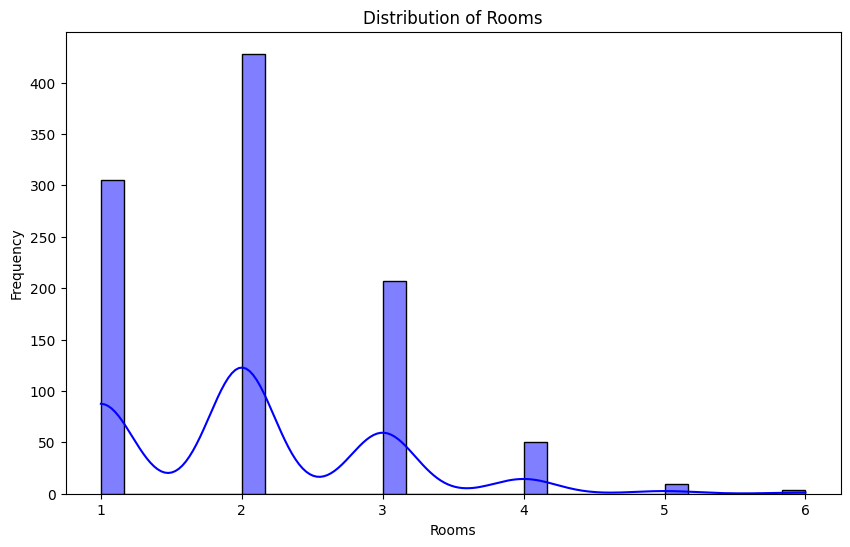

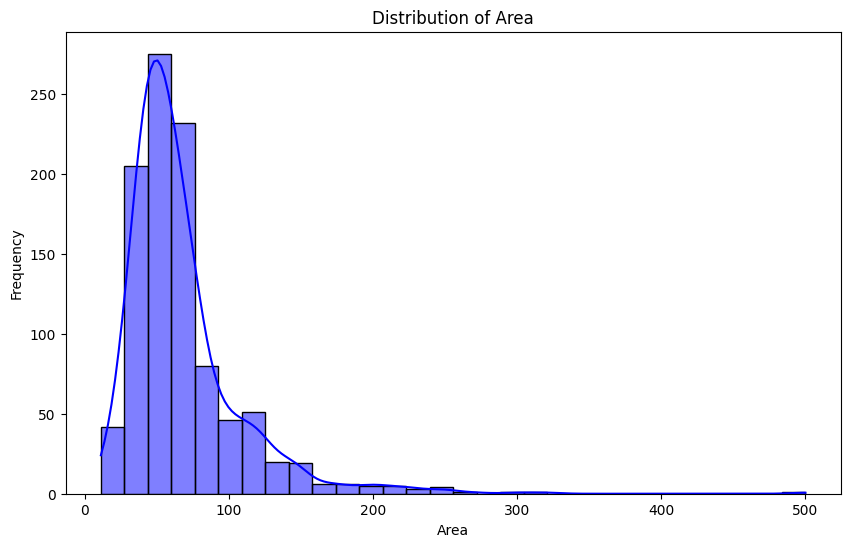

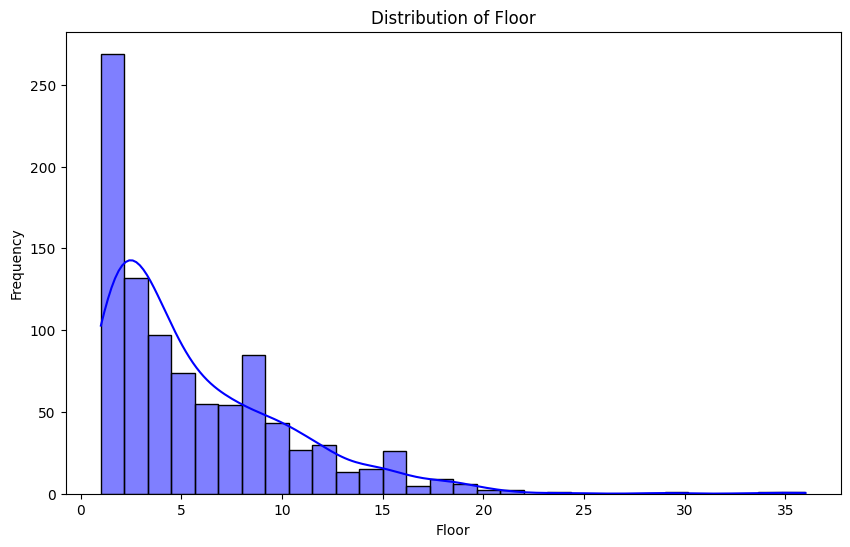

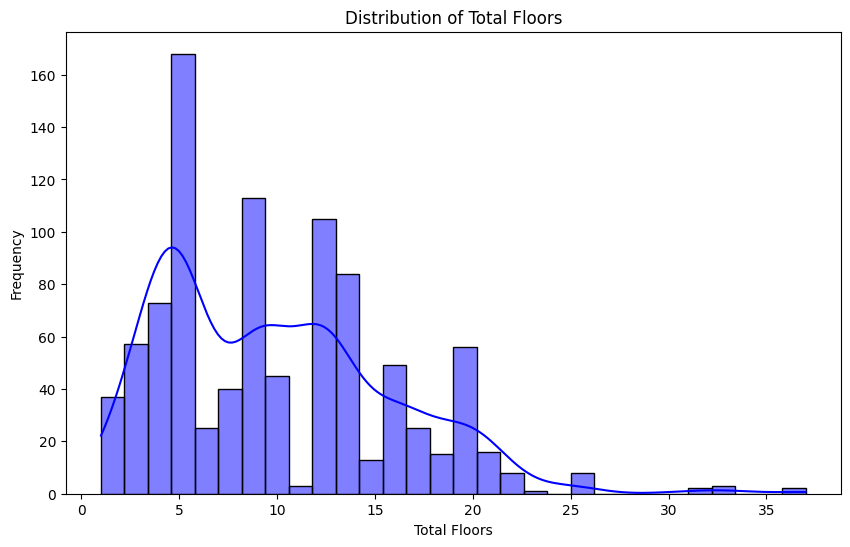

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

for column in df_selected.select_dtypes(include=[np.number]).columns:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

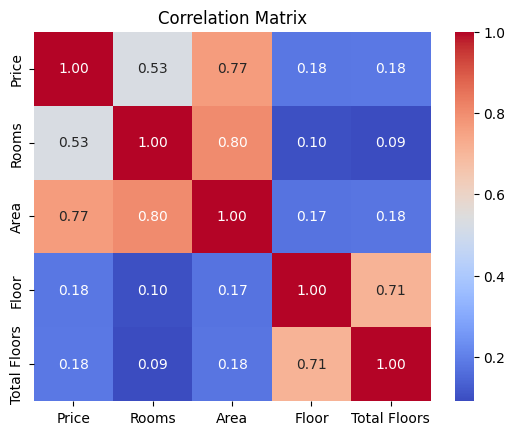

In [13]:
correlation_matrix = df_selected.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()

In [14]:
df = df.dropna()
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929 entries, 0 to 1002
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       929 non-null    int64  
 1   Ad Link          929 non-null    object 
 2   Price            929 non-null    float64
 3   Text Preview     929 non-null    object 
 4   Rooms            929 non-null    float64
 5   Area             929 non-null    float64
 6   Floor            929 non-null    float64
 7   Total Floors     929 non-null    float64
 8   district         929 non-null    object 
 9   address          929 non-null    object 
 10  Lemmatized Text  929 non-null    object 
 11  Translated Text  929 non-null    object 
 12  бөлмелі          929 non-null    float64
 13  жайлы            929 non-null    float64
 14  жалға            929 non-null    float64
 15  жаңа             929 non-null    float64
 16  жиһаздалған      929 non-null    float64
 17  кешені           929

In [15]:
df.columns

Index(['Unnamed: 0', 'Ad Link', 'Price', 'Text Preview', 'Rooms', 'Area',
       'Floor', 'Total Floors', 'district', 'address', 'Lemmatized Text',
       'Translated Text', 'бөлмелі', 'жайлы', 'жалға', 'жаңа', 'жиһаздалған',
       'кешені', 'пәтер', 'толық', 'тұрғын', 'үй'],
      dtype='object')

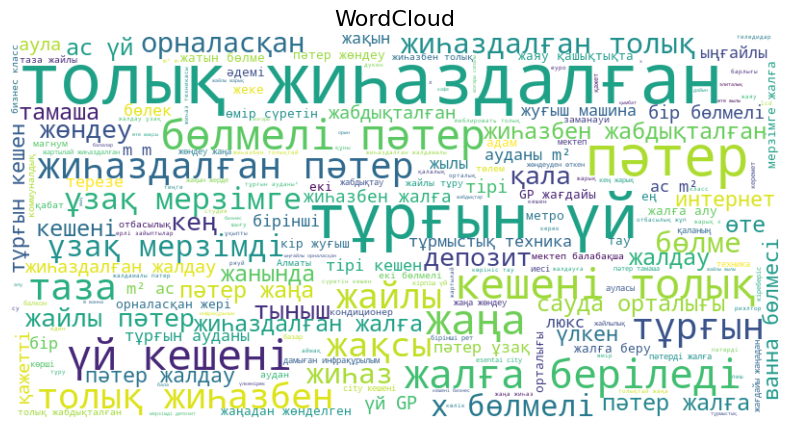

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from deep_translator import GoogleTranslator
from nltk.corpus import stopwords

stop_words = set(stopwords.words('russian') + stopwords.words('kazakh'))

# Объединяем все переведенные тексты в один
all_text = " ".join(df['Translated Text'])

# Создаем WordCloud
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white',
    stopwords=stop_words,  # Учитываем стоп-слова
    colormap='viridis',  # Цветовая схема
).generate(all_text)

# Визуализируем WordCloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Убираем оси
plt.title("WordCloud", fontsize=16)
plt.show()

In [17]:
important_columns = ['Ad Link', 'Price', 'Rooms', 'Area', 'Floor', 'Total Floors', 'district', 'жиһаздалған', 'жаңа']
df = df[important_columns]
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ad Link       929 non-null    object 
 1   Price         929 non-null    float64
 2   Rooms         929 non-null    float64
 3   Area          929 non-null    float64
 4   Floor         929 non-null    float64
 5   Total Floors  929 non-null    float64
 6   district      929 non-null    object 
 7   жиһаздалған   929 non-null    float64
 8   жаңа          929 non-null    float64
dtypes: float64(7), object(2)
memory usage: 72.6+ KB


In [18]:
df.head()

,Ad Link,Price,Rooms,Area,Floor,Total Floors,district,жиһаздалған,жаңа
0,https://krisha.kz/a/show/679070311,180000.0,1.0,36.0,12.0,12.0,Алатауский р-н,0.000000,0.0
1,https://krisha.kz/a/show/699809718,150000.0,1.0,33.0,3.0,4.0,Ауэзовский р-н,0.000000,0.0
2,https://krisha.kz/a/show/691887173,350000.0,2.0,51.0,3.0,25.0,Абиша Кекилбайулы 270 — ТРЦ Mega Center,0.465828,0.0
3,https://krisha.kz/a/show/696471308,380000.0,1.0,50.0,6.0,20.0,Бостандыкский р-н,0.000000,0.0
4,https://krisha.kz/a/show/699610607,500000.0,3.0,65.0,8.0,9.0,Алмалинский р-н,0.000000,0.0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ad Link       929 non-null    object 
 1   Price         929 non-null    float64
 2   Rooms         929 non-null    float64
 3   Area          929 non-null    float64
 4   Floor         929 non-null    float64
 5   Total Floors  929 non-null    float64
 6   district      929 non-null    object 
 7   жиһаздалған   929 non-null    float64
 8   жаңа          929 non-null    float64
dtypes: float64(7), object(2)
memory usage: 72.6+ KB


In [20]:
print(df.duplicated().sum())

8


In [21]:
unique_values = df['district'].unique()
print(unique_values)

['Алатауский р-н' 'Ауэзовский р-н'
 'Абиша Кекилбайулы 270 — ТРЦ Mega Center' 'Бостандыкский р-н'
 'Алмалинский р-н' 'Медеуский р-н' 'Наурызбайский р-н' 'Турксибский р-н'
 'Жетысуский р-н'
 'Туркменская — Район Назарбаева-Жансугурова  ул. Туркменская 15  Рядом Цум Арбат 2 остановки']


In [22]:
mapping = {
    'Аль-Фараби 41': 'Бостандыкский р-н',
    'Байтұрсынов 4 — Гоголь': 'Алмалинский р-н',
    'Варламова 27в — Озеро Сайран': 'Алмалинский р-н',
    'Пр. Райымбека 245В': 'Жетысуский р-н',
    'Сейфулина 469а\u200b': 'Алмалинский р-н',
    'Тобаякова 2а/5 — Жансугурова':'Жетысуский р-н',
    'Тараз 7 к1 — Мир Кайрат':'Турксибский р-н',
    'Туркменская — Район Назарбаева-Жансугурова  ул. Туркменская 15  Рядом Цум Арбат 2 остановки':'Жетысуский р-н',
    'Сейфуллина 574/1 к3':'Бостандыкский р-н',
    'Тлендиева 223 — Станция метро Сайран':'Алмалинский р-н',
    'Абишева 36/8':'Наурызбайский р-н',
    'Абиша Кекилбайулы 270 — ТРЦ Mega Center':'Бостандыкский р-н',
    'Шевченко 130':'Алмалинский р-н',
    'Раимбек Батыра 169 — Магнум':'Жетысуский р-н',
    'Панфилова 30':'Алмалинский р-н',
    'Аскарова Асанбая 21':'Наурызбайский р-н',
    'Богенбай батыра 279 — Айманова':'Алмалинский р-н',
    'Арайлы — Ремизовка':'Бостандыкский р-н',
    'Жамбыла 105 — Байтурсынова':'Алмалинский р-н',
    'Байтурсынова 191':'Бостандыкский р-н'
}

df['district'] = df['district'].replace(mapping)

In [23]:
unique_values = df['district'].unique()
print(unique_values)

['Алатауский р-н' 'Ауэзовский р-н' 'Бостандыкский р-н' 'Алмалинский р-н'
 'Медеуский р-н' 'Наурызбайский р-н' 'Турксибский р-н' 'Жетысуский р-н']


In [24]:
df.isnull().sum()

Ad Link         0
Price           0
Rooms           0
Area            0
Floor           0
Total Floors    0
district        0
жиһаздалған     0
жаңа            0
dtype: int64

In [25]:
df.shape

(929, 9)

In [26]:
# Anomaly Detection с учетом TF-IDF признаков без нормализации TF-IDF
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# Подготовка числовых данных
numerical_features = df[['Rooms', 'Area', 'Floor', 'Total Floors', 'Price']].fillna(0)

# Увеличиваем вес столбца Price
numerical_features['Price'] = numerical_features['Price'] * 5  # Увеличиваем вклад Price

# Нормализация только числовых признаков
scaler = StandardScaler()
numerical_features_scaled = scaler.fit_transform(numerical_features)

# Создаем DataFrame с нормализованными числовыми признаками
numerical_features_scaled_df = pd.DataFrame(
    numerical_features_scaled, columns=numerical_features.columns, index=df.index
)
print(numerical_features_scaled_df.shape)

# TF-IDF признаки (оставляем их как есть)
tfidf_features = df[['жиһаздалған', 'жаңа']]  # Убедитесь, что эти колонки существуют
print(tfidf_features.shape)

# Пересечение индексов для синхронизации
common_indices = numerical_features_scaled_df.index.intersection(tfidf_features.index)

# Обновляем df под общие индексы
df = df.loc[common_indices]

# Обновляем числовые и TF-IDF признаки под общие индексы
numerical_features_scaled_df = numerical_features_scaled_df.loc[common_indices]
tfidf_features = tfidf_features.loc[common_indices]

# Объединение нормализованных числовых признаков с TF-IDF признаками
combined_features = pd.concat(
    [numerical_features_scaled_df, tfidf_features], axis=1
)
print(combined_features.shape)

(929, 5)
(929, 2)
(929, 7)


In [27]:
combined_features.head()

,Rooms,Area,Floor,Total Floors,Price,жиһаздалған,жаңа
0,-1.143924,-0.778907,1.366758,0.352088,-0.590691,0.000000,0.0
1,-1.143924,-0.851311,-0.588995,-1.010787,-0.652302,0.000000,0.0
2,-0.071567,-0.416884,-0.588995,2.566760,-0.241562,0.465828,0.0
3,-1.143924,-0.441019,0.062923,1.714963,-0.179951,0.000000,0.0
4,1.000789,-0.078996,0.497534,-0.158990,0.066493,0.000000,0.0


In [28]:
df.head(15)

,Ad Link,Price,Rooms,Area,Floor,Total Floors,district,жиһаздалған,жаңа
0,https://krisha.kz/a/show/679070311,180000.0,1.0,36.0,12.0,12.0,Алатауский р-н,0.000000,0.000000
1,https://krisha.kz/a/show/699809718,150000.0,1.0,33.0,3.0,4.0,Ауэзовский р-н,0.000000,0.000000
2,https://krisha.kz/a/show/691887173,350000.0,2.0,51.0,3.0,25.0,Бостандыкский р-н,0.465828,0.000000
3,https://krisha.kz/a/show/696471308,380000.0,1.0,50.0,6.0,20.0,Бостандыкский р-н,0.000000,0.000000
4,https://krisha.kz/a/show/699610607,500000.0,3.0,65.0,8.0,9.0,Алмалинский р-н,0.000000,0.000000
5,https://krisha.kz/a/show/697030647,600000.0,4.0,146.0,8.0,9.0,Бостандыкский р-н,0.420394,0.000000
6,https://krisha.kz/a/show/57051312,220000.0,1.0,28.0,12.0,13.0,Алмалинский р-н,0.000000,0.000000
7,https://krisha.kz/a/show/682293978,280000.0,2.0,45.0,12.0,13.0,Алмалинский р-н,0.259995,0.441151
8,https://krisha.kz/a/show/699705545,140000.0,1.0,17.0,1.0,4.0,Алатауский р-н,0.631271,0.000000
9,https://krisha.kz/a/show/663333517,700000.0,3.0,132.5,6.0,12.0,Бостандыкский р-н,0.000000,0.000000


In [29]:
df.isnull().sum()

Ad Link         0
Price           0
Rooms           0
Area            0
Floor           0
Total Floors    0
district        0
жиһаздалған     0
жаңа            0
dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 929 entries, 0 to 1002
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ad Link       929 non-null    object 
 1   Price         929 non-null    float64
 2   Rooms         929 non-null    float64
 3   Area          929 non-null    float64
 4   Floor         929 non-null    float64
 5   Total Floors  929 non-null    float64
 6   district      929 non-null    object 
 7   жиһаздалған   929 non-null    float64
 8   жаңа          929 non-null    float64
dtypes: float64(7), object(2)
memory usage: 72.6+ KB



Настройка гиперпараметров для района: Алатауский р-н
Параметры: {'contamination': 0.05} -> Silhouette Score: 0.2831
Параметры: {'contamination': 0.1} -> Silhouette Score: 0.2360
Параметры: {'contamination': 0.15} -> Silhouette Score: 0.2016
Лучшие параметры для района Алатауский р-н: {'contamination': 0.05} с Silhouette Score: 0.2831

Настройка гиперпараметров для района: Алмалинский р-н
Параметры: {'contamination': 0.05} -> Silhouette Score: 0.3955
Параметры: {'contamination': 0.1} -> Silhouette Score: 0.3184
Параметры: {'contamination': 0.15} -> Silhouette Score: 0.2775
Лучшие параметры для района Алмалинский р-н: {'contamination': 0.05} с Silhouette Score: 0.3955

Настройка гиперпараметров для района: Ауэзовский р-н
Параметры: {'contamination': 0.05} -> Silhouette Score: 0.4390
Параметры: {'contamination': 0.1} -> Silhouette Score: 0.3433
Параметры: {'contamination': 0.15} -> Silhouette Score: 0.2658
Лучшие параметры для района Ауэзовский р-н: {'contamination': 0.05} с Silhouette S

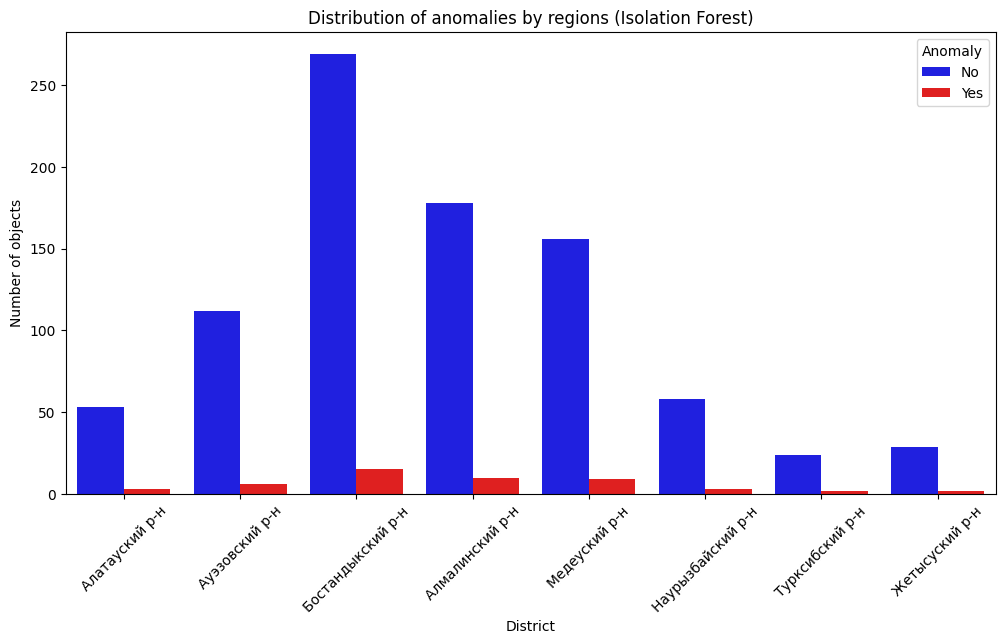

In [31]:
from sklearn.ensemble import IsolationForest
from sklearn.metrics import silhouette_score
from sklearn.model_selection import ParameterGrid
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Гиперпараметры для настройки
param_grid = { 
    'contamination': [0.05, 0.1, 0.15] 
}

def tune_isolation_forest(data, param_grid):
    best_params = None
    best_model = None
    best_silhouette = -1 
    
    for params in ParameterGrid(param_grid):
        model = IsolationForest(
            contamination=params['contamination'],
            random_state=42
        )
        
        model.fit(data)
        predictions = model.predict(data)
        labels = pd.Series(predictions).map({1: 0, -1: 1})  # 1 - аномалия, 0 - нормальная

        if len(np.unique(labels)) > 1:
            silhouette = silhouette_score(data, labels)  # Расчёт Silhouette Score
        else:
            silhouette = -1 

        print(f"Параметры: {params} -> Silhouette Score: {silhouette:.4f}")
        
        # Сохраняем параметры с максимальным Silhouette Score
        if silhouette > best_silhouette:
            best_silhouette = silhouette
            best_params = params
            best_model = model

    return best_model, best_params, best_silhouette

# Проходимся по каждому району
for district, group in df.groupby('district'):
    print(f"\nНастройка гиперпараметров для района: {district}")
    
    group_combined_features = combined_features.loc[group.index].dropna()

    # Настройка и выбор лучших гиперпараметров
    best_model, best_params, best_silhouette = tune_isolation_forest(group_combined_features, param_grid)
    print(f"Лучшие параметры для района {district}: {best_params} с Silhouette Score: {best_silhouette:.4f}")
    
    district_anomalies = best_model.predict(group_combined_features)
    district_anomalies = pd.Series(district_anomalies, index=group.index).map({1: 0, -1: 1})
    
    df.loc[group.index, 'Anomaly'] = district_anomalies

anomalies_count = df['Anomaly'].value_counts()

# Визуализация распределения аномалий по районам
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='district', hue='Anomaly', palette={0: 'blue', 1: 'red'})
plt.xticks(rotation=45)
plt.title('Distribution of anomalies by regions (Isolation Forest)')
plt.xlabel('District')
plt.ylabel('Number of objects')
plt.legend(title='Anomaly', labels=['No', 'Yes'])
plt.show()

In [32]:
df.head(15)

,Ad Link,Price,Rooms,Area,Floor,Total Floors,district,жиһаздалған,жаңа,Anomaly
0,https://krisha.kz/a/show/679070311,180000.0,1.0,36.0,12.0,12.0,Алатауский р-н,0.000000,0.000000,0.0
1,https://krisha.kz/a/show/699809718,150000.0,1.0,33.0,3.0,4.0,Ауэзовский р-н,0.000000,0.000000,0.0
2,https://krisha.kz/a/show/691887173,350000.0,2.0,51.0,3.0,25.0,Бостандыкский р-н,0.465828,0.000000,0.0
3,https://krisha.kz/a/show/696471308,380000.0,1.0,50.0,6.0,20.0,Бостандыкский р-н,0.000000,0.000000,0.0
4,https://krisha.kz/a/show/699610607,500000.0,3.0,65.0,8.0,9.0,Алмалинский р-н,0.000000,0.000000,0.0
5,https://krisha.kz/a/show/697030647,600000.0,4.0,146.0,8.0,9.0,Бостандыкский р-н,0.420394,0.000000,0.0
6,https://krisha.kz/a/show/57051312,220000.0,1.0,28.0,12.0,13.0,Алмалинский р-н,0.000000,0.000000,0.0
7,https://krisha.kz/a/show/682293978,280000.0,2.0,45.0,12.0,13.0,Алмалинский р-н,0.259995,0.441151,0.0
8,https://krisha.kz/a/show/699705545,140000.0,1.0,17.0,1.0,4.0,Алатауский р-н,0.631271,0.000000,0.0
9,https://krisha.kz/a/show/663333517,700000.0,3.0,132.5,6.0,12.0,Бостандыкский р-н,0.000000,0.000000,0.0


In [33]:
anomalies_by_district = df[df['Anomaly'] == 1].groupby('district').size().reset_index(name='Anomalies_Count')

print(anomalies_by_district)

            district  Anomalies_Count
0     Алатауский р-н                3
1    Алмалинский р-н               10
2     Ауэзовский р-н                6
3  Бостандыкский р-н               15
4     Жетысуский р-н                2
5      Медеуский р-н                9
6  Наурызбайский р-н                3
7    Турксибский р-н                2


In [34]:
df[df['district'] == 'Бостандыкский р-н'].head(15)

,Ad Link,Price,Rooms,Area,Floor,Total Floors,district,жиһаздалған,жаңа,Anomaly
2,https://krisha.kz/a/show/691887173,350000.0,2.0,51.0,3.0,25.0,Бостандыкский р-н,0.465828,0.000000,0.0
3,https://krisha.kz/a/show/696471308,380000.0,1.0,50.0,6.0,20.0,Бостандыкский р-н,0.000000,0.000000,0.0
5,https://krisha.kz/a/show/697030647,600000.0,4.0,146.0,8.0,9.0,Бостандыкский р-н,0.420394,0.000000,0.0
9,https://krisha.kz/a/show/663333517,700000.0,3.0,132.5,6.0,12.0,Бостандыкский р-н,0.000000,0.000000,0.0
10,https://krisha.kz/a/show/696701315,380000.0,2.0,47.0,10.0,12.0,Бостандыкский р-н,0.465828,0.000000,0.0
15,https://krisha.kz/a/show/699708925,620000.0,3.0,109.0,3.0,3.0,Бостандыкский р-н,0.139622,0.000000,0.0
17,https://krisha.kz/a/show/693180206,390000.0,1.0,50.0,7.0,25.0,Бостандыкский р-н,0.427345,0.000000,0.0
19,https://krisha.kz/a/show/678866890,780000.0,2.0,69.0,19.0,19.0,Бостандыкский р-н,0.342371,0.000000,0.0
21,https://krisha.kz/a/show/698492333,330000.0,2.0,60.0,4.0,9.0,Бостандыкский р-н,0.290247,0.000000,0.0
22,https://krisha.kz/a/show/699815108,300000.0,3.0,82.6,5.0,5.0,Бостандыкский р-н,0.000000,0.000000,0.0


In [35]:
from sklearn.metrics import silhouette_score

# Метки кластеров: 1 (аномалия) и 0 (нормальные)
labels = df['Anomaly']

# Оценка качества кластеризации
silhouette = silhouette_score(combined_features, labels)

print(f"Silhouette Score: {silhouette:.4f}")

Silhouette Score: 0.4338


In [36]:
#Recomendation system
# Запрос предпочтений пользователя
print("Select one area (enter number):")
print("""
0 - Алатауский р-н
1 - Алмалинский р-н
2 - Ауэзовский р-н
3 - Бостандыкский р-н
4 - Жетысуский р-н
5 - Медеуский р-н
6 - Наурызбайский р-н
7 - Турксибский р-н
""")
selected_district = input("Enter the district number: ")

# Преобразуем номер в название района
district_map = {
    "0": "Алатауский р-н",
    "1": "Алмалинский р-н",
    "2": "Ауэзовский р-н",
    "3": "Бостандыкский р-н",
    "4": "Жетысуский р-н",
    "5": "Медеуский р-н",
    "6": "Наурызбайский р-н",
    "7": "Турксибский р-н"
}

if selected_district not in district_map:
    print("Error: Invalid district number selected.")
else:
    selected_district_name = district_map[selected_district]

    # Запрос других предпочтений
    min_area = float(input("Enter the minimum area of ​​the apartment: "))
    min_rooms = int(input("Please enter the minimum number of rooms: "))
    furnished = int(input("Should the apartment be furnished? (0 - no, 1 - yes): "))
    budget = float(input("Enter your budget: "))

    # Фильтрация квартир на основе предпочтений
    filtered_df = df[
        (df['district'] == selected_district_name) &  # Выбранный район
        (df['Area'] >= min_area) &                   # Минимальная площадь
        (df['Rooms'] >= min_rooms) &                 # Минимальное количество комнат
        ((df['жиһаздалған'] != 0) if furnished else (df['жиһаздалған'] == 0)) &  # Учет меблировки
        (df['Price'] <= budget) &                    # Бюджет
        (df['Anomaly'] == 0)                         # Только неаномальные квартиры
    ]

    # Рекомендация: берем топ-3 квартиры по наименьшей цене
    recommended_apartments = filtered_df.sort_values(by='Price').head(3)

    # Вывод рекомендаций
    if not recommended_apartments.empty:
        print("\nWe recommend the following apartments:")
        print(recommended_apartments[['Ad Link', 'Price', 'Rooms', 'Area', 'district', 'жиһаздалған']])
    else:
        print("\nUnfortunately, no access apartments were found.")

Select one area (enter number):

0 - Алатауский р-н
1 - Алмалинский р-н
2 - Ауэзовский р-н
3 - Бостандыкский р-н
4 - Жетысуский р-н
5 - Медеуский р-н
6 - Наурызбайский р-н
7 - Турксибский р-н


We recommend the following apartments:
                                Ad Link     Price  Rooms  Area  \
981  https://krisha.kz/a/show/699826118  230000.0    2.0  50.0   
864  https://krisha.kz/a/show/699310165  250000.0    2.0  55.0   
918  https://krisha.kz/a/show/687508687  260000.0    3.0  75.0   

           district  жиһаздалған  
981  Ауэзовский р-н     1.000000  
864  Ауэзовский р-н     0.708611  
918  Ауэзовский р-н     0.235785  
